# **ROC Curve**

## What is an ROC Curve?

The ROC (Receiver Operating Characteristic) curve is a graphical representation used to evaluate the performance of a binary classification model. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

## Key Components

- **True Positive Rate (TPR):**
  Also known as Sensitivity or Recall, it is the proportion of actual positives correctly identified by the model. It is calculated as:
  $$
  \text{TPR} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
  $$

- **False Positive Rate (FPR):**
  It is the proportion of actual negatives that are incorrectly classified as positives by the model. It is calculated as:
  $$
  \text{FPR} = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}}
  $$

- **Threshold:**
  The value used to convert the model's predicted probabilities into binary outcomes. Different thresholds result in different TPR and FPR values.

## How the ROC Curve is Constructed

1. **Compute TPR and FPR:**
   For each threshold value, calculate the TPR and FPR.

2. **Plot TPR vs. FPR:**
   Create a plot with FPR on the x-axis and TPR on the y-axis for each threshold.

3. **Curve Formation:**
   Connect the points to form the ROC curve. The curve shows the trade-off between TPR and FPR across different thresholds.

## Uses of ROC Curve

### 1. Threshold Selection

- **Purpose:**
  Helps in selecting the optimal threshold for classification by visualizing how different thresholds affect TPR and FPR.
  
- **Application:**
  By examining the ROC curve, you can choose a threshold that balances the trade-offs according to specific needs, such as minimizing false positives or maximizing true positives.

### 2. Model Comparison

- **Purpose:**
  Allows comparison of different models by comparing their ROC curves.
  
- **Application:**
  A model with a ROC curve that is closer to the top-left corner generally performs better. The area under the ROC curve (AUC) provides a summary measure of model performance.

### 3. Performance Evaluation

- **Purpose:**
  Provides a visual assessment of a model's performance and its ability to distinguish between classes.
  
- **Application:**
  The ROC curve and AUC help in understanding how well the model is performing across all threshold values.

## Key Metrics

- **AUC (Area Under the Curve):**
  Represents the overall performance of the model. A higher AUC indicates better model performance, with a value of 1.0 representing a perfect model.

# **Effect of TPR and FPR on the ROC Curve**

1. **Increasing TPR:**
   - **Effect on ROC Curve**: As TPR increases, the ROC curve moves upwards. This means that the model is correctly identifying more positive cases.
   - **Impact on FPR**: Typically, increasing TPR involves lowering the decision threshold, which may increase the FPR because more negative cases are incorrectly classified as positive. The ROC curve will show a rise in the TPR, often accompanied by a rise in the FPR.

2. **Decreasing TPR:**
   - **Effect on ROC Curve**: As TPR decreases, the ROC curve moves downwards. This indicates that the model is missing more positive cases.
   - **Impact on FPR**: To decrease TPR, you may increase the threshold, which often results in a lower FPR. The ROC curve will show a drop in TPR and a potential decrease in FPR.

3. **Increasing FPR:**
   - **Effect on ROC Curve**: Increasing FPR causes the ROC curve to move to the right. This happens when the model starts incorrectly classifying more negative cases as positive.
   - **Impact on TPR**: When FPR increases, it generally means that the model’s threshold is being lowered, which might also increase TPR as the model becomes more lenient in classifying cases as positive.

4. **Decreasing FPR:**
   - **Effect on ROC Curve**: Decreasing FPR moves the ROC curve to the left. This indicates that the model is correctly classifying more negative cases.
   - **Impact on TPR**: Lowering FPR usually involves increasing the threshold, which can reduce TPR since the model becomes more conservative, classifying fewer cases as positive.

## Summary

- **ROC Curve Shape**: The shape of the ROC curve provides insight into the trade-offs between TPR and FPR at various thresholds. A curve that hugs the top-left corner indicates a model with high TPR and low FPR, which is ideal.
- **Threshold Selection**: Adjusting the threshold affects both TPR and FPR. Lowering the threshold generally increases TPR but also increases FPR. Conversely, raising the threshold decreases both TPR and FPR.
- **Model Comparison**: Models with ROC curves closer to the top-left corner are generally better, as they achieve higher TPR for lower FPR.

Understanding these dynamics helps in selecting the right model and threshold based on specific needs, such as balancing sensitivity (TPR) and specificity (1 - FPR) in applications like medical diagnostics or fraud detection.


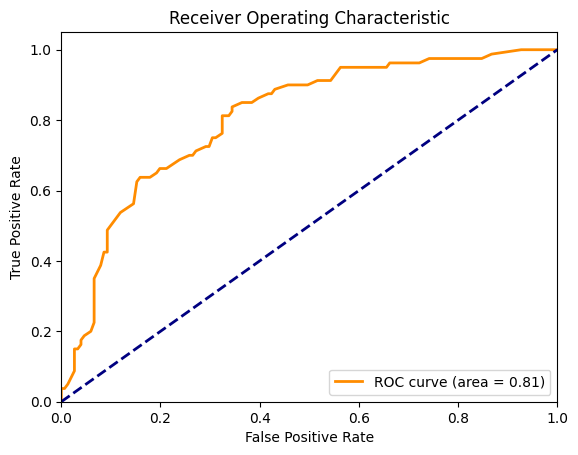

Selected Threshold: 0.35


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Load the dataset
url = 'https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv'
data = pd.read_csv(url)

# Define features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Threshold Selection Example
# Choose a threshold based on the ROC curve
# For demonstration, we select the threshold that gives us a TPR of 0.8
desired_tpr = 0.8
index = np.argmax(tpr >= desired_tpr)
selected_threshold = thresholds[index]

print(f"Selected Threshold: {selected_threshold}")

# **AUC-ROC**

## What is AUC-ROC?

**AUC-ROC** stands for **Area Under the Receiver Operating Characteristic Curve**. It is a performance measurement for classification models, particularly useful for binary classification tasks.

- **ROC Curve (Receiver Operating Characteristic Curve):** A graphical plot that illustrates the diagnostic ability of a binary classifier as its discrimination threshold is varied. The curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR).

- **AUC (Area Under the Curve):** The area under the ROC curve provides a single scalar value to evaluate the model's performance. It represents the model's ability to discriminate between positive and negative classes.

## AUC-ROC Metrics

- **AUC = 1:** Indicates a perfect model. The model can distinguish between positive and negative classes with 100% accuracy.

- **AUC = 0.5:** Indicates no discriminative power, equivalent to random guessing. The model cannot distinguish between positive and negative classes better than chance.

- **AUC < 0.5:** Indicates a model that performs worse than random guessing. This may suggest that the model is inversely related to the target variable or there is an issue with the model.

## Importance of AUC-ROC

- **Threshold Independence:** AUC-ROC evaluates performance across all possible thresholds, providing a comprehensive measure of model performance that is not dependent on a specific threshold value.

- **Model Comparison:** It allows for the comparison of different models based on their ability to separate classes. Higher AUC values generally indicate better model performance.

- **Class Imbalance:** AUC-ROC is particularly useful when dealing with class imbalance, as it provides a robust evaluation metric that reflects model performance across various thresholds.

## How to Interpret AUC-ROC

- **Higher AUC Values:** A higher AUC value indicates a better model. It suggests that the model has a higher probability of ranking a randomly chosen positive instance higher than a randomly chosen negative instance.

- **Curve Shape:** A ROC curve that is closer to the top-left corner of the plot indicates a better model with higher TPR and lower FPR.

## Example Code

Here is a Python code example for calculating and plotting AUC-ROC:



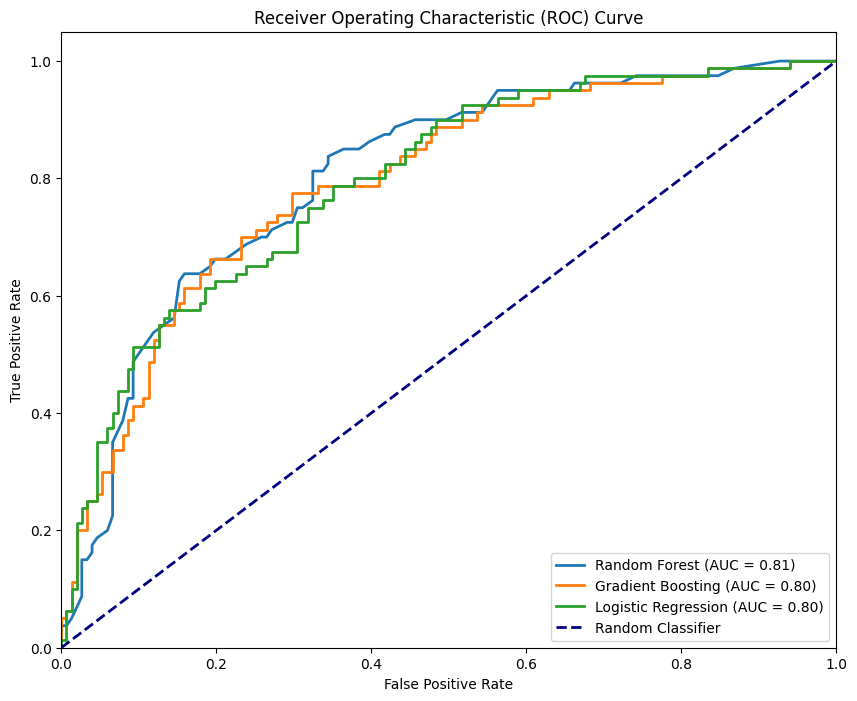


AUC Results:
Random Forest: AUC = 0.81
Gradient Boosting: AUC = 0.80
Logistic Regression: AUC = 0.80


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Load the dataset
url = 'https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv'
data = pd.read_csv(url)

# Define features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Prepare for AUC-ROC plotting
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Get predicted probabilities
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Compute AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC curve for a random classifier
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC results
print("\nAUC Results:")
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    print(f"{name}: AUC = {roc_auc:.2f}")